In [64]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random 

from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model

In [65]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [82]:
# this is the size of our encoded representations
encoding_dim = 32 #32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = tf.keras.Input(shape=(784,),name='Entrada')
# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(224, activation='relu')(input_img)
encoded1 = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded1 = tf.keras.layers.Dense(224, activation='relu')(encoded1)
decoded = tf.keras.layers.Dense(784, activation='sigmoid', name='Salida')(decoded1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [85]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded1)

In [88]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoded1 = tf.keras.layers.Dense(224, activation='relu')(encoded_input)
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(decoded1))

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_21 (Dense)            (None, 224)               175840    
                                                                 
 dense_22 (Dense)            (None, 32)                7200      
                                                                 
 dense_23 (Dense)            (None, 224)               7392      
                                                                 
 Salida (Dense)              (None, 784)               176400    
                                                                 
Total params: 366,832
Trainable params: 366,832
Non-trainable params: 0
_________________________________________________________________


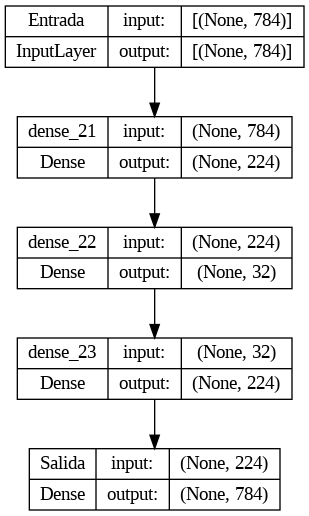

In [89]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='Autoencoder.png', show_shapes=True)

In [90]:
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

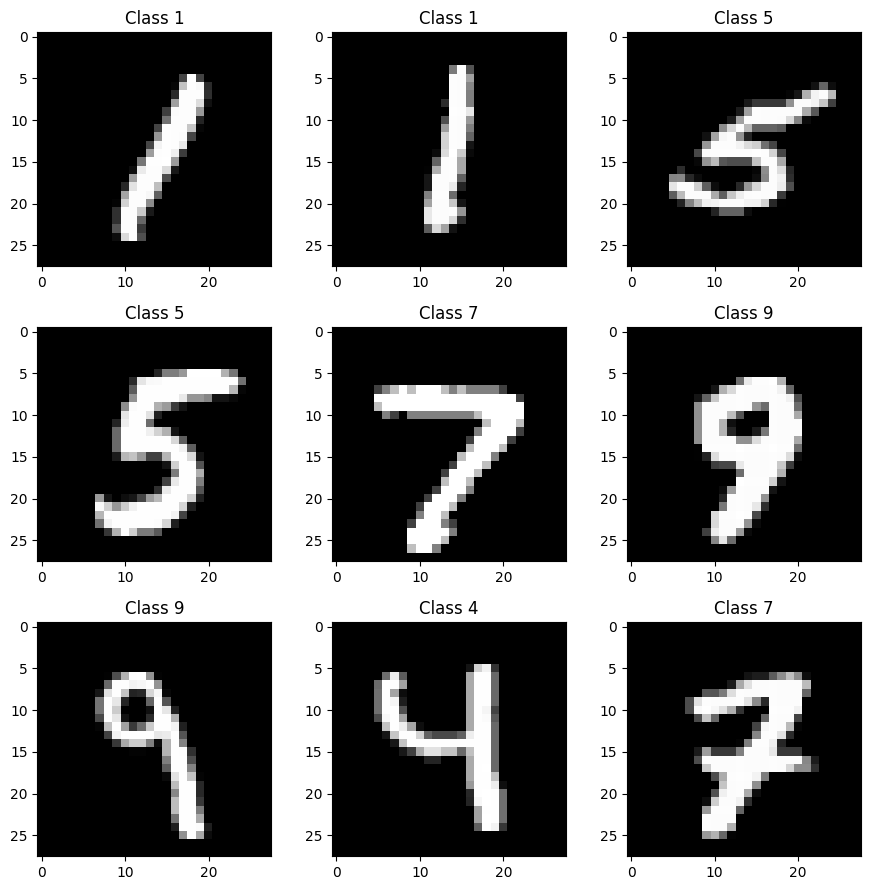

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [92]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(x_train[num])

0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0    0    0   19   29   29   92  141  191  141   13   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0    0    0    0   26  169  225  252  252  253  252  252  252  188   0  0  0  0  0  0  
0  0  0  0  0  0  0   0    0   86   85  123  222  253  252  252  252  253  252  

In [93]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [94]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/200
235/235 [==============================] - 4s 7ms/step - loss: 0.2106 - val_loss: 0.1340
Epoch 2/200
235/235 [==============================] - 1s 6ms/step - loss: 0.1203 - val_loss: 0.1084
Epoch 3/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1003
Epoch 4/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0991 - val_loss: 0.0956
Epoch 5/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0956 - val_loss: 0.0931
Epoch 6/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0935 - val_loss: 0.0914
Epoch 7/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0920 - val_loss: 0.0903
Epoch 8/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0908 - val_loss: 0.0892
Epoch 9/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0898 - val_loss: 0.0886
Epoch 10/200
235/235 [==============================] - 1s 6ms/step - loss: 0.0889 - val_lo

In [95]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


In [96]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


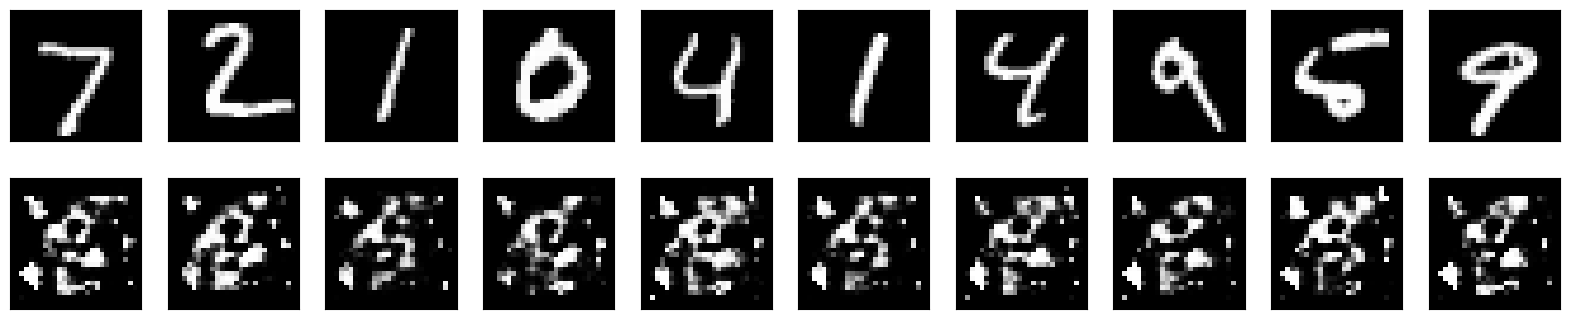

In [97]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 1ms/step


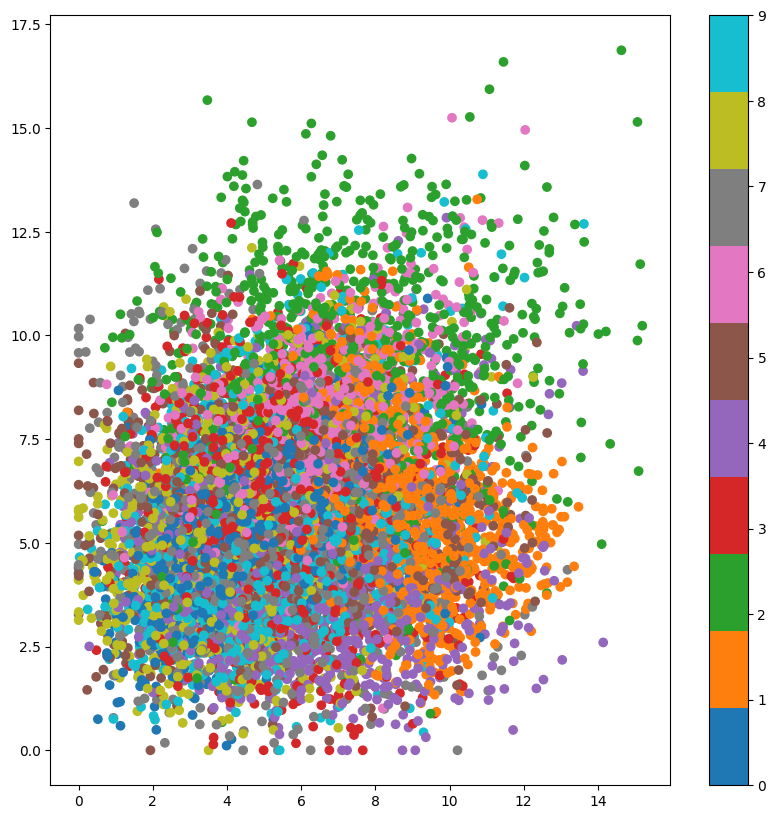

In [98]:
codes = encoder.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(codes[:,0],codes[:,1], c=y_test, cmap='tab10')
plt.colorbar()
plt.show()

In [99]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder.predict(x_test)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

313/313 [==============================] - 0s 1ms/step


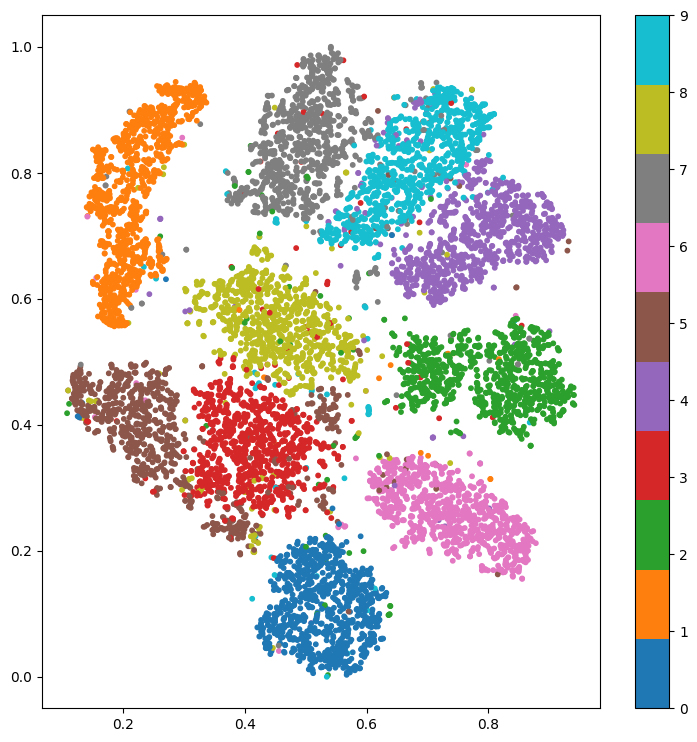

In [100]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_test, s=10, cmap="tab10")
#plt.axis("off")
plt.colorbar()
plt.show()